## Load Libraries

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import cm
import mpl_toolkits.mplot3d.art3d as art3d

import os
import pandas as pd


matplotlib.rcParams['font.family'] = [ 'serif']
matplotlib.rcParams['agg.path.chunksize'] = 10000

### Define Local Path where `example_filaments` is located

In [2]:
import sys  
sys.path.insert(0, '/Users/zaraafrooz/Desktop/Cosmic_Filaments_AstroCom/filament_work_zara/example_filaments')

import read_fils as rf

### Define path to `DisPerSE` output

In [3]:
skeleton_file_dm = '/Users/zaraafrooz/Desktop/Cosmic_Filaments_AstroCom/filament_work_zara/example_filaments/del_galaxy.NDnet_s5.up.NDskl.BRK.a.NDskl'
filaments_dm = rf.ReadFilament(skeleton_file_dm)
filament_dm_dict = filaments_dm.filament_dict

header1, ANDSKEL

ndims, 3

Comments, #No comments (RB)

Bounding box, BBOX [-9.46958,-11.2398,-10.2952] [19.1849,19.2268,23.9453]

ncrit, 142
nfils, 90
Reading data fields:
CP field: persistence_ratio

CP field: persistence_nsigmas

CP field: persistence

CP field: persistence_pair

CP field: parent_index

CP field: parent_log_index

CP field: log_field_value

CP field: field_value

CP field: cell

Filament field: field_value

Filament field: orientation

Filament field: cell

Filament field: log_field_value

Filament field: type

Reading filaments took 0.00 secs.


### Look at what is in the dictionary

In [4]:
filament_dm_dict.keys()

dict_keys(['ncrit', 'critical_points', 'nfils', 'filaments', 'nb_CP_fields', 'CP_fields', 'nb_fil_fields', 'fil_fields'])

In [5]:
#number of filaments
nfils = filament_dm_dict['nfils']
print(nfils)

90


In [6]:
#first filament
filament_dm_dict['filaments'][0]

{'cp1_idx': 15.0,
 'cp2_idx': 12.0,
 'nsamp': 10,
 'px,py,pz': [[-2.81356, -2.00726, -1.79707],
  [-3.34829, -2.21085, -2.10106],
  [-3.55129, -2.20702, -2.52764],
  [-3.54704, -2.07235, -2.75681],
  [-3.62038, -2.03417, -2.75514],
  [-3.9371, -2.2373, -2.73826],
  [-4.38406, -2.60411, -2.52365],
  [-4.64688, -2.84577, -2.42487],
  [-4.78, -2.92492, -2.53663],
  [-4.79659, -2.93978, -2.5334]],
 'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]}

In [7]:
#if you want to access any of the information for that filament, you can index further
filament_dm_dict['filaments'][0]['Field Vals'][0] #give syou

4.293599

### Define some analysis functions

In [8]:
def plot_dm_filament(filament_idx,filament_dict,ax,colorfil='slateblue'):
    
    
    nsamp = filament_dict['filaments'][filament_idx]['nsamp']
    
    positions = filament_dict['filaments'][filament_idx]['px,py,pz']
    
    

    #plot the samples in between
    px = []
    py = []
    pz = []
    
    
    for i in range(nsamp):

        px_,py_,pz_ = positions[i][0],positions[i][1],positions[i][2]



        px.append(px_)
        py.append(py_)
        pz.append(pz_)

    
    fil_line = ax.plot3D(px,py,pz,c=colorfil,lw = '2',alpha=0.4)

### Plot filaments

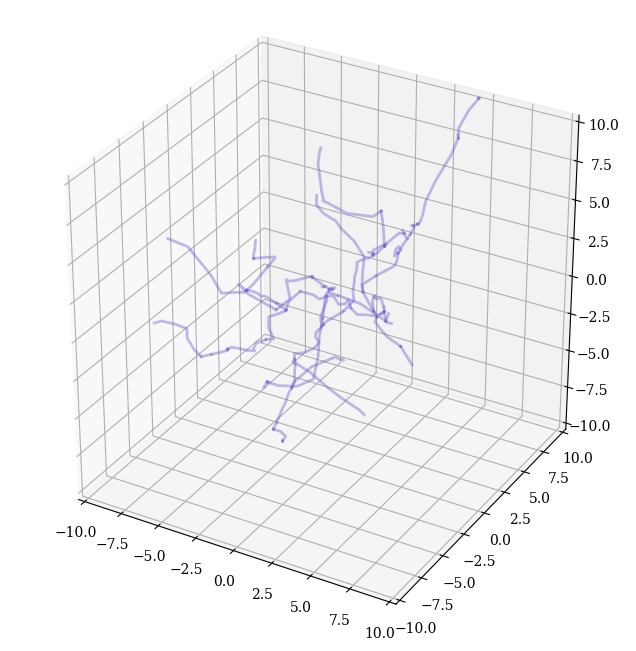

In [9]:
fig = plt.figure(figsize=[8,8])

ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1,1,1])

for fil_idx in range(nfils):
    plot_dm_filament(fil_idx,filament_dm_dict,ax)

    
extent = 10
ax.set_xlim(-extent,extent)
ax.set_ylim(-extent,extent)
ax.set_zlim(-extent,extent)
plt.show()

In [10]:
fil = filament_dm_dict['filaments']
fivals= 'Field Vals'

pr = []
for fils in fil:
    p = fils[fivals][4]
    pr.append(p)

print(pr)

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


In [11]:
filament_dm_dict['fil_fields']

['field_value\n', 'orientation\n', 'cell\n', 'log_field_value\n', 'type\n']

In [12]:
def filval(k):
    f = []
    for fils in fil:
        p = fils[fivals][k]
        f.append(p)
    return f

len(filament_dm_dict['fil_fields'])

5